<!-- PROJECT LOGO -->
<br />
<div align="center">
  <a>
    <img src="https://res.cloudinary.com/dek4evg4t/image/upload/v1727075740/embedx.png" alt="Logo" width="40%">
  </a>
</div>


### 🖹 Descripción: 
El presente notebook demuestra la implementación de un chatbot basado en embeddings de texto utilizando técnicas de comparación de similitud de coseno. El chatbot recibe preguntas en lenguaje natural, convierte las posibles respuestas en embeddings y selecciona la más relevante comparando los vectores de las respuestas con el de la pregunta. El propósito del chatbot es responder de manera coherente dentro de un conjunto limitado de respuestas predefinidas.


### ✍️ Autores: 
* Angelo Ortiz Vega - [@angelortizv](https://github.com/angelortizv)
* Alejandro Campos Abarca - [@MajinLoop](https://github.com/MajinLoop)

### 📅 Fecha: 
23 de septiembre de 2024.

### 📝 Notas: 
- Asegurarse de que Python esté instalado, junto con bibliotecas necesarias como numpy, scipy, y spaCy.
- El notebook utiliza embeddings preentrenados para las respuestas, por lo que no se entrena un modelo de embeddings desde cero.
- Es fundamental cargar correctamente el conjunto de respuestas predefinidas y transformarlas en embeddings antes de recibir las preguntas de los usuarios.
- Se recomienda utilizar la similitud de coseno como métrica para comparar el vector de la pregunta con los vectores de las respuestas.
- El chatbot responde con la respuesta que tenga la mayor similitud con la pregunta recibida.

# 1. Definir el propósito y las respuestas del chatbot

Primero, definimos el propósito del chatbot y las respuestas posibles.


## 1.1. Definir propósito

In [164]:
purpose = """
El chatbot será un asistente virtual que responderá preguntas comunes relacionadas con temas de tecnología.
Contará con 10 respuestas predefinidas que cubren temas como inteligencia artificial, machine learning, bases de datos, y programación.
"""
print(purpose)


El chatbot será un asistente virtual que responderá preguntas comunes relacionadas con temas de tecnología.
Contará con 10 respuestas predefinidas que cubren temas como inteligencia artificial, machine learning, bases de datos, y programación.



## 1.2. Definir respuestas

In [165]:
answers = [
    "La inteligencia artificial es una rama de la informática que busca crear sistemas que imiten la inteligencia humana.",
    "El aprendizaje automático es una subrama de la IA que se enfoca en crear modelos que puedan aprender de los datos.",
    "Las bases de datos relacionales almacenan datos en tablas que se pueden relacionar entre sí.",
    "Python es un lenguaje de programación popular por su simplicidad y versatilidad.",
    "Machine learning se refiere a algoritmos que aprenden de los datos para hacer predicciones o tomar decisiones.",
    "Existen varios frameworks para deep learning como TensorFlow y PyTorch.",
    "El procesamiento de lenguaje natural es una rama de la IA que trabaja con el entendimiento de lenguaje humano.",
    "Un algoritmo de clasificación asigna una categoría a una observación basada en sus características.",
    "Para realizar consultas en bases de datos SQL se utiliza el lenguaje de consulta estructurado.",
    "El desarrollo ágil es una metodología que se enfoca en la entrega continua y colaborativa de software."
]

# 2. Transformar las respuestas en embeddings y crear un dataset de conocimiento

Utilizaremos spaCy (https://spacy.io/) para convertir las respuestas en embeddings.

## 2.1. Instalar e importar bibliotecas necesarias

In [166]:
#!pip install spacy
#!python -m spacy download es_core_news_md

import spacy
import numpy as np
from scipy.spatial.distance import cosine

## 2.2. Cargar modelo de spaCy para embeddings en español

La siguiente linea carga un modelo preentrenado de procesamiento del lenguaje natural en español utilizando la biblioteca spaCy. 

El modelo es de tamaño mediano y ofrece un equilibrio entre precisión y rendimiento. Al utilizar el objeto nlp, se pueden realizar diversas tareas de análisis lingüístico, como la tokenización del texto, el etiquetado gramatical para identificar partes del habla, la vectorización de palabras para calcular similitudes y el reconocimiento de entidades nombradas. 

Referencias:
- https://spacy.io/models/es
- https://huggingface.co/spacy/es_core_news_md
- https://fxis.ai/edu/how-to-use-the-spacy-spanish-model-es_core_news_md/

In [167]:
# Load spaCy model
nlp = spacy.load("es_core_news_md")

## 2.3. Convertir respuestas en embeddings

In [168]:
# Create the embeddings of the responses
def generate_embeddings(answers):
    return [nlp(answer).vector for answer in answers]

# Embeddings of the answers
embeddings_answers = generate_embeddings(answers)

## 2.4. Almacenar los embeddings en un dataset de conocimiento

In [169]:
# Create a knowledge dataset with the answers and their embeddings
embedex_dataset = list(zip(answers, embeddings_answers))

# 3. Transformar la pregunta del usuario en embeddings

Vamos a convertir la pregunta del usuario en un embedding de manera similar a las respuestas.

## 3.1. Solicitar una pregunta del usuario

In [170]:
question = input("Por favor, ingresa tu pregunta: ")

Por favor, ingresa tu pregunta:  Qué es la Inteligencia Artificial?


## 3.2. Generar embedding de la pregunta

In [171]:
# Get the embedding of the user's question
embedding_question = nlp(question).vector

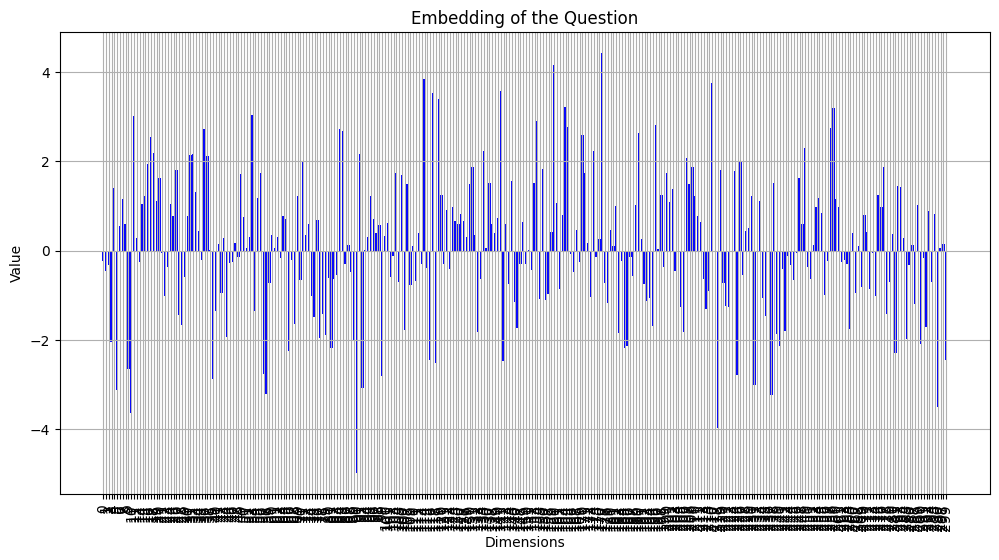

In [176]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(embedding_question)), embedding_question, color='blue')
plt.title('Embedding of the Question')
plt.xlabel('Dimensions')
plt.ylabel('Value')
plt.xticks(ticks=np.arange(len(embedding_question)), rotation=90)
plt.grid()
plt.show()

# 4. Comparar los embeddings con similitud de coseno y seleccionar la respuesta más acorde

Utilizaremos la similitud de coseno para comparar el embedding de la pregunta del usuario con las respuestas y seleccionar la más similar.

## 4.1. Definir función para calcular la similitud de coseno

In [139]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(embedding1, embedding2):
    return cosine_similarity([embedding1], [embedding2])[0][0]

## 4.2. Comparar el embedding de la pregunta con cada respuesta y seleccionar la más similar

In [140]:
# Compare the question with the answers and find the most similar one
def get_most_similar_answer(embedding_question, dataset):
    similarities = [calculate_similarity(embedding_question, embedding_answer) for _, embedding_answer in dataset]
    most_similar_index = np.argmax(similarities)
    return dataset[most_similar_index][0], similarities[most_similar_index]

# Get the most similar answer
most_similar_answer, similarity = get_most_similar_answer(embedding_question, embedex_dataset)

print(f"Respuesta más similar: {most_similar_answer} (Similitud: {similarity})")

Respuesta más similar: La inteligencia artificial es una rama de la informática que busca crear sistemas que imiten la inteligencia humana. (Similitud: 0.7093461751937866)


# 5. Proceso para múltiples preguntas

In [141]:
user_questions = [
    "¿Qué es la inteligencia artificial?", 
    "¿Qué es Machine learning?", # not answered correctly -- pending review
    "¿Qué son los embeddings de palabras?",  # not based
    "Explícame sobre procesamiento del lenguaje natural", 
    "¿Para qué sirve un chatbot?",  # not based
    "¿Qué es Python?", 
    "Frameworks para deep learning",  
    "¿Qué es un modelo de lenguaje?",  # not based
    "¿Cómo se aplica la IA en la vida cotidiana?",  # not based
    "¿Qué es la minería de datos?",  # not based
    "¿Cómo se evalúa el rendimiento de un modelo de machine learning?",  # not based
    "Hablame sobre bases de datos relacionales", # not answered correctly -- pending review
    "¿Qué asigna un algoritmo de clasificación?", # not answered correctly -- pending review
    "¿Qué es el desarrollo ágil?", # not answered correctly -- pending review
    "desarrollo agil"
]

In [143]:
user_responses = []

for i, question in enumerate(user_questions):
    print(f"Pregunta {i + 1}: {question}")
    question_embedding = nlp(question).vector
    
    similarities = [1 - cosine(question_embedding, emb) for emb in embeddings_answers]
    index_answer = np.argmax(similarities)
    similarity_score = similarities[index_answer]
    
    response = answers[index_answer]

    user_responses.append(response)

    print(f"Respuesta más acorde {i + 1}: {response} (Similitud: {similarity_score:.2f})")
    
    print('-' * 50)

Pregunta 1: ¿Qué es la inteligencia artificial?
Respuesta más acorde 1: La inteligencia artificial es una rama de la informática que busca crear sistemas que imiten la inteligencia humana. (Similitud: 0.56)
--------------------------------------------------
Pregunta 2: ¿Qué es Machine learning?
Respuesta más acorde 2: Python es un lenguaje de programación popular por su simplicidad y versatilidad. (Similitud: 0.16)
--------------------------------------------------
Pregunta 3: ¿Qué son los embeddings de palabras?
Respuesta más acorde 3: Machine learning se refiere a algoritmos que aprenden de los datos para hacer predicciones o tomar decisiones. (Similitud: 0.40)
--------------------------------------------------
Pregunta 4: Explícame sobre procesamiento del lenguaje natural
Respuesta más acorde 4: El procesamiento de lenguaje natural es una rama de la IA que trabaja con el entendimiento de lenguaje humano. (Similitud: 0.81)
--------------------------------------------------
Pregunta 5

# 6. Visualización de Embeddings con t-SNE

In [162]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_embeddings(embeddings, labels=None, title="Visualización de Embeddings"):
    # Convert the list of embeddings to a NumPy array
    embeddings = np.array(embeddings)
    
    # Adjust the perplexity to be less than the number of samples
    perplexity_value = min(embeddings.shape[0] - 1, 5)  # Set perplexity to 5 or less
    
    # Apply t-SNE to reduce the dimensionality of the embeddings to 2D
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot the reduced embeddings
    plt.figure(figsize=(8, 6))
    
    # Plot each point
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', marker='o')
    
    # Ensure labels match the number of embeddings
    if labels:
        labels = labels[:embeddings_2d.shape[0]]  # Trim labels to the size of embeddings
        for i, label in enumerate(labels):
            plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    
    plt.title(title)
    plt.show()

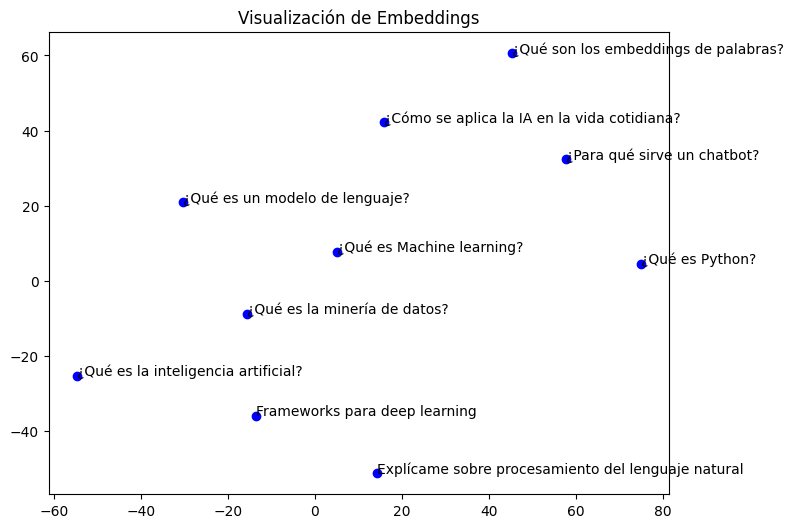

In [163]:
visualize_embeddings(embeddings_answers, labels=user_questions)